## Zadanie wstępne

In [16]:
import math
import numpy as np
from matplotlib import pyplot as plt

import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters.plotters import plot_cost_history
from pyswarms.utils.plotters.plotters import plot_contour
from pyswarms.utils.plotters.formatters import Mesher

2023-03-20 15:27:18,012 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|200/200, best_cost=1.69e-12
2023-03-20 15:27:18,358 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.686434252367303e-12, best pos: [9.88510091e-07 8.42188846e-07]


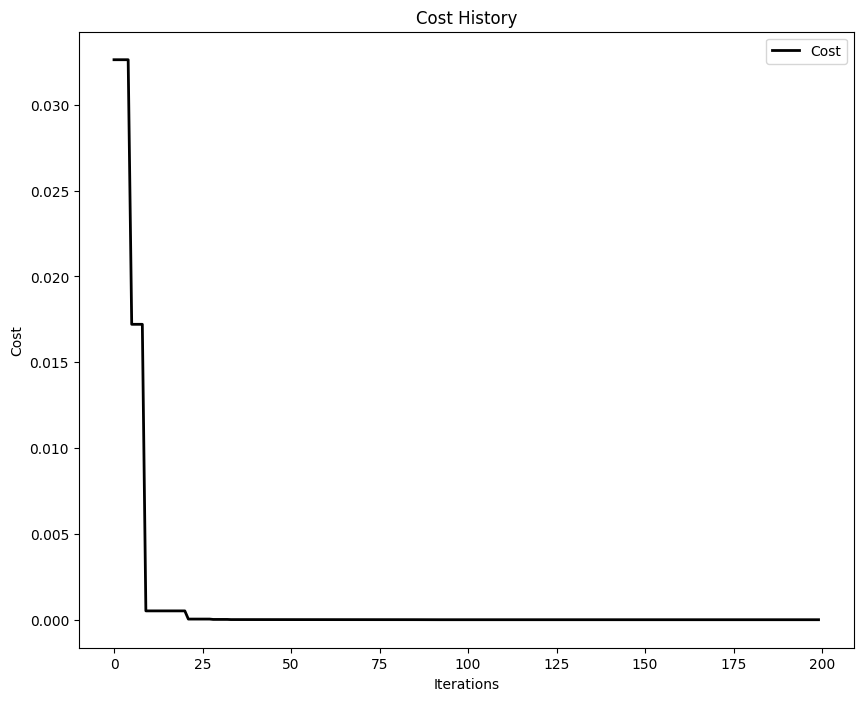

In [2]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=200)

# Obtain cost history from optimizer instance
cost_history = optimizer.cost_history

# Plot!
plot_cost_history(cost_history)
plt.show()
# best cost: 8.976204042170683e-13, best pos: [-9.46832719e-07 -3.35887855e-08]

## Zadanie wstępne dla chętnych

2023-03-20 15:27:18,705 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|50/50, best_cost=2.25e-6
2023-03-20 15:27:18,800 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.253413761842321e-06, best pos: [0.00072711 0.00131329]
2023-03-20 15:27:21,497 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-20 15:27:21,498 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


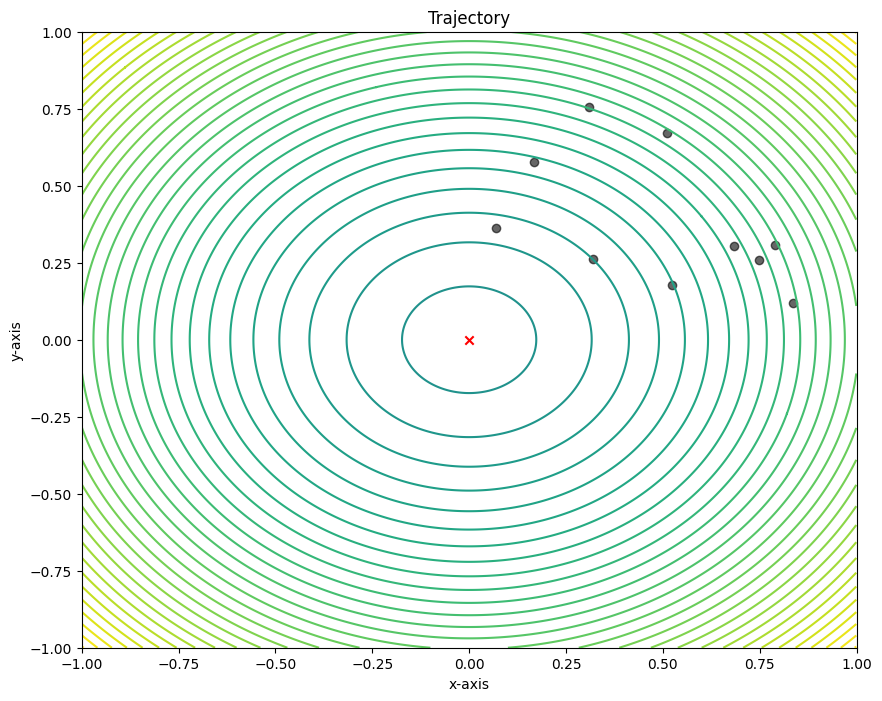

In [3]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9} 
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
optimizer.optimize(fx.sphere, iters=50)

# tworzenie animacji 
m = Mesher(func=fx.sphere) 
animation = plot_contour(pos_history=optimizer.pos_history, mesher=m, mark=(0, 0))
animation.save('plot0.gif', writer='imagemagick', fps=10)
# best cost: 3.762502105831193e-05, best pos: [-0.00289358  0.00540853]

## Zadanie 1

### a) i b)

In [4]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

#ograniczenia dla dziedziny
x_max = [2, 2]
x_min = [1, 1]
my_bounds = (x_min, x_max)

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=my_bounds)

optimizer.optimize(fx.sphere, iters=1000)
# (2.0188468766177294, array([1.00472339, 1.00467795]))

2023-03-20 15:27:29,573 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|1000/1000, best_cost=2.02
2023-03-20 15:27:31,362 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.021634833154206, best pos: [1.00469077 1.00609706]


(2.021634833154206, array([1.00469077, 1.00609706]))

### c)

In [5]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

#ograniczenia dla dziedziny
x_max = np.ones(6)
x_min = np.zeros(6)
my_bounds = (x_min, x_max)

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options, bounds=my_bounds)

optimizer.optimize(fx.sphere, iters=1000)
# best cost: 0.10548788964818528, best pos: [0.07312848 0.024005   0.21723359 0.15189936 0.03860679 0.16676193]

2023-03-20 15:27:31,402 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|1000/1000, best_cost=0.029
2023-03-20 15:27:32,990 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.02896933670527964, best pos: [0.13152791 0.05246718 0.021985   0.08663573 0.02427838 0.01839593]


(0.02896933670527964,
 array([0.13152791, 0.05246718, 0.021985  , 0.08663573, 0.02427838,
        0.01839593]))

### d) i e)

In [6]:
def endurance(A):
    return math.exp(-2*(A[1]-math.sin(A[0]))**2)+math.sin(A[2]*A[3])+math.cos(A[4]*A[5])

def f(x):
    n_particles = x.shape[0]
    j = [-endurance(x[i]) for i in range(n_particles)]
    return np.array(j)

In [7]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

#ograniczenia dla dziedziny
x_max = np.ones(6)
x_min = np.zeros(6)
my_bounds = (x_min, x_max)

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options, bounds=my_bounds)

optimizer.optimize(f, iters=1000)
# best cost: -2.8205558704464346, best pos: [0.42126335 0.33587498 0.98521762 0.99852173 0.14796206 0.3599737 ]

2023-03-20 15:27:33,042 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|1000/1000, best_cost=-2.79
2023-03-20 15:27:34,181 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.7918682894233404, best pos: [0.26854852 0.24679697 0.99875651 0.91757719 0.1109507  0.37865473]


(-2.7918682894233404,
 array([0.26854852, 0.24679697, 0.99875651, 0.91757719, 0.1109507 ,
        0.37865473]))

### f)

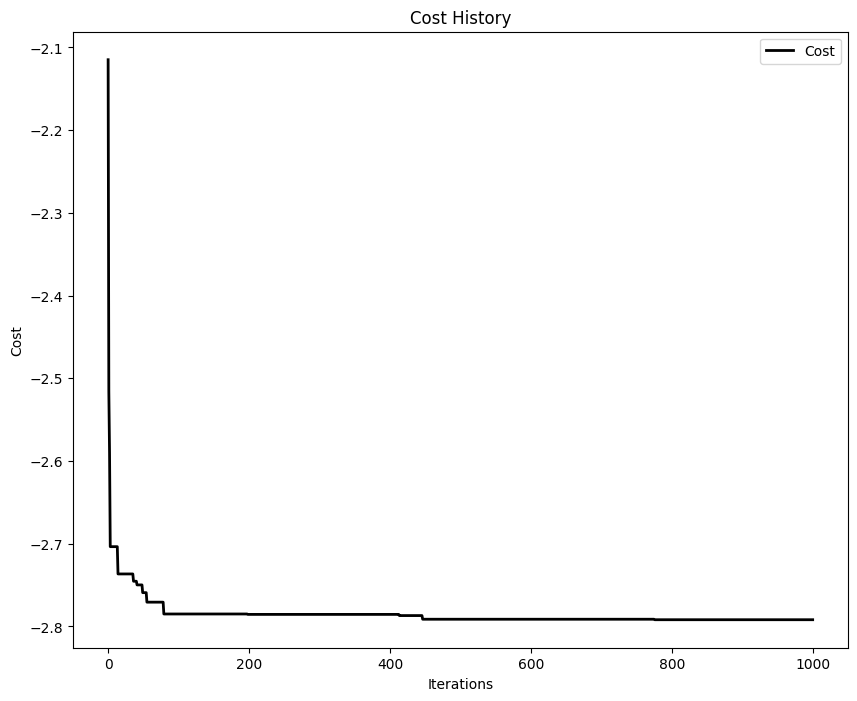

In [8]:
cost_history = optimizer.cost_history

plot_cost_history(cost_history)
plt.show()

## Zadanie 2

In [17]:
import random
import time
from aco import AntColony

In [10]:
import sys
sys.version

'3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]'

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

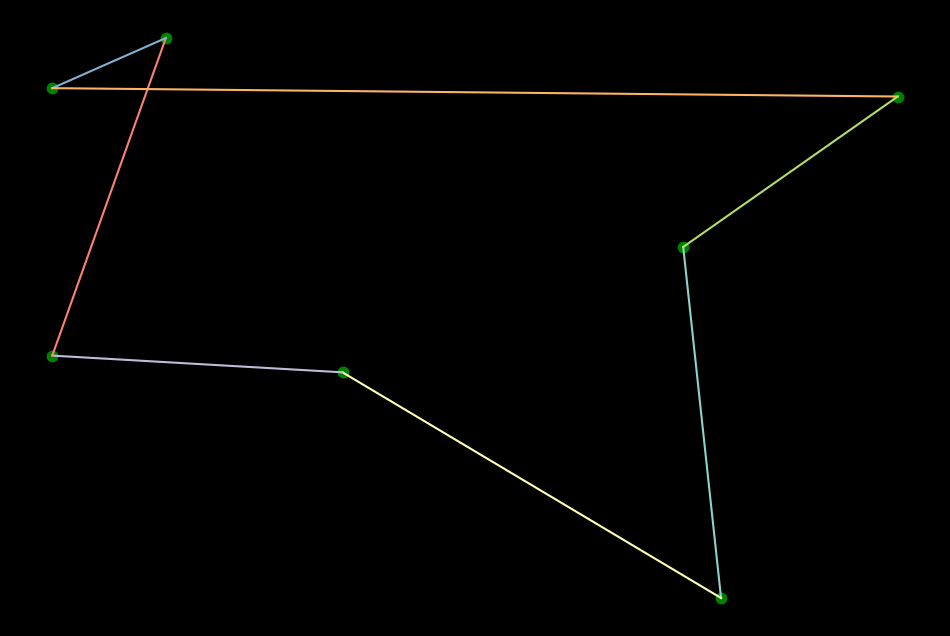

In [11]:
plt.style.use("dark_background")


COORDS = (
    (20, 52),
    (43, 50),
    (20, 84),
    (70, 65),
    (29, 90),
    (87, 83),
    (73, 23),
)

def random_coord():
    r = random.randint(0, len(COORDS))
    return r


def plot_nodes(w=12, h=8):
    for x, y in COORDS:
        plt.plot(x, y, "g.", markersize=15)
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])


def plot_all_edges():
    paths = ((a, b) for a in COORDS for b in COORDS)

    for a, b in paths:
        plt.plot((a[0], b[0]), (a[1], b[1]))


plot_nodes()

colony = AntColony(COORDS, ant_count=300, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                    iterations=300)

optimal_nodes = colony.get_path()

for i in range(len(optimal_nodes) - 1):
    plt.plot(
        (optimal_nodes[i][0], optimal_nodes[i + 1][0]),
        (optimal_nodes[i][1], optimal_nodes[i + 1][1]),
    )

plt.show()

In [12]:
# Wnioski
# ...

### b)

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

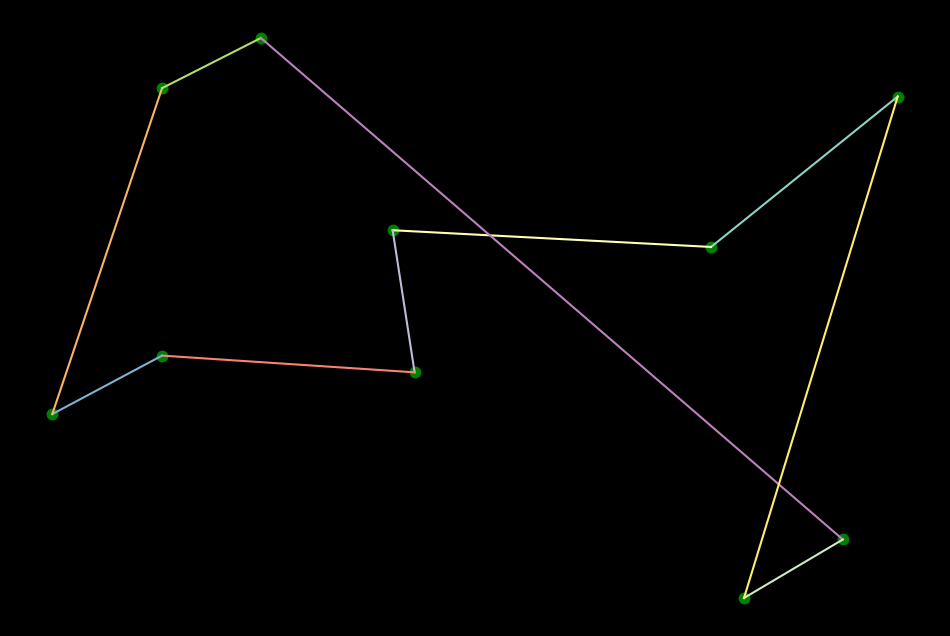

In [14]:
plt.style.use("dark_background")

COORDS = (
    (20, 52),
    (43, 50),
    (20, 84),
    (70, 65),
    (29, 90),
    (87, 83),
    (73, 23),
    (10, 45),
    (82, 30),
    (41, 67)
)

def random_coord():
    r = random.randint(0, len(COORDS))
    return r


def plot_nodes(w=12, h=8):
    for x, y in COORDS:
        plt.plot(x, y, "g.", markersize=15)
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])


def plot_all_edges():
    paths = ((a, b) for a in COORDS for b in COORDS)

    for a, b in paths:
        plt.plot((a[0], b[0]), (a[1], b[1]))

plot_nodes()

colony = AntColony(COORDS, ant_count=300, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                    iterations=300)

optimal_nodes = colony.get_path()

for i in range(len(optimal_nodes) - 1):
    plt.plot(
        (optimal_nodes[i][0], optimal_nodes[i + 1][0]),
        (optimal_nodes[i][1], optimal_nodes[i + 1][1]),
    )

plt.show()

### c)

In [19]:
czasy = []
for i in [100, 300, 500]:
    start = time.time()

    colony = AntColony(COORDS, ant_count=i, alpha=0.5, beta=1.2, 
                        pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                        iterations=300)

    optimal_nodes = colony.get_path()

    end = time.time()
    czasy.append(end - start)
print(czasy)
# im więcej mrówek tym dłuższy czas iteracji

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

iteration:  226
iteration:  227
iteration:  228
iteration:  229
iteration:  230
iteration:  231
iteration:  232
iteration:  233
iteration:  234
iteration:  235
iteration:  236
iteration:  237
iteration:  238
iteration:  239
iteration:  240
iteration:  241
iteration:  242
iteration:  243
iteration:  244
iteration:  245
iteration:  246
iteration:  247
iteration:  248
iteration:  249
iteration:  250
iteration:  251
iteration:  252
iteration:  253
iteration:  254
iteration:  255
iteration:  256
iteration:  257
iteration:  258
iteration:  259
iteration:  260
iteration:  261
iteration:  262
iteration:  263
iteration:  264
iteration:  265
iteration:  266
iteration:  267
iteration:  268
iteration:  269
iteration:  270
iteration:  271
iteration:  272
iteration:  273
iteration:  274
iteration:  275
iteration:  276
iteration:  277
iteration:  278
iteration:  279
iteration:  280
iteration:  281
iteration:  282
iteration:  283
iteration:  284
iteration:  285
iteration:  286
iteration:  287
iteratio

In [20]:
czasy = []
for i in [0.1, 0.5, 0.9]:
    start = time.time()

    colony = AntColony(COORDS, ant_count=300, alpha=i, beta=1.2, 
                        pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                        iterations=300)

    optimal_nodes = colony.get_path()

    end = time.time()
    czasy.append(end - start)
print(czasy)
# szybkość znajdowania rozwiązania jest porównywalna dla różnych alpha, jednak 0.5 wydaje się być wartością optymalną

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

iteration:  227
iteration:  228
iteration:  229
iteration:  230
iteration:  231
iteration:  232
iteration:  233
iteration:  234
iteration:  235
iteration:  236
iteration:  237
iteration:  238
iteration:  239
iteration:  240
iteration:  241
iteration:  242
iteration:  243
iteration:  244
iteration:  245
iteration:  246
iteration:  247
iteration:  248
iteration:  249
iteration:  250
iteration:  251
iteration:  252
iteration:  253
iteration:  254
iteration:  255
iteration:  256
iteration:  257
iteration:  258
iteration:  259
iteration:  260
iteration:  261
iteration:  262
iteration:  263
iteration:  264
iteration:  265
iteration:  266
iteration:  267
iteration:  268
iteration:  269
iteration:  270
iteration:  271
iteration:  272
iteration:  273
iteration:  274
iteration:  275
iteration:  276
iteration:  277
iteration:  278
iteration:  279
iteration:  280
iteration:  281
iteration:  282
iteration:  283
iteration:  284
iteration:  285
iteration:  286
iteration:  287
iteration:  288
iteratio

In [21]:
czasy = []
for i in [0.6, 1.2, 2]:
    start = time.time()

    colony = AntColony(COORDS, ant_count=300, alpha=0.5, beta=i, 
                        pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                        iterations=300)

    optimal_nodes = colony.get_path()

    end = time.time()
    czasy.append(end - start)
print(czasy)
# czasy są zblżone dla różnych beta, zmiana tego parametru nie ma dużego wpływu na szybkość znajdowania rozwiązania

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

iteration:  227
iteration:  228
iteration:  229
iteration:  230
iteration:  231
iteration:  232
iteration:  233
iteration:  234
iteration:  235
iteration:  236
iteration:  237
iteration:  238
iteration:  239
iteration:  240
iteration:  241
iteration:  242
iteration:  243
iteration:  244
iteration:  245
iteration:  246
iteration:  247
iteration:  248
iteration:  249
iteration:  250
iteration:  251
iteration:  252
iteration:  253
iteration:  254
iteration:  255
iteration:  256
iteration:  257
iteration:  258
iteration:  259
iteration:  260
iteration:  261
iteration:  262
iteration:  263
iteration:  264
iteration:  265
iteration:  266
iteration:  267
iteration:  268
iteration:  269
iteration:  270
iteration:  271
iteration:  272
iteration:  273
iteration:  274
iteration:  275
iteration:  276
iteration:  277
iteration:  278
iteration:  279
iteration:  280
iteration:  281
iteration:  282
iteration:  283
iteration:  284
iteration:  285
iteration:  286
iteration:  287
iteration:  288
iteratio

In [22]:
czasy = []
for i in [0.15, 0.4, 0.8]:
    start = time.time()

    colony = AntColony(COORDS, ant_count=300, alpha=0.5, beta=1.2, 
                        pheromone_evaporation_rate=i, pheromone_constant=1000.0,
                        iterations=300)

    optimal_nodes = colony.get_path()

    end = time.time()
    czasy.append(end - start)
print(czasy)
# zmiana wartości parametru pheromone_evaporation_rate nie wpływa na szybkość znajdowania rozwiązania

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

iteration:  226
iteration:  227
iteration:  228
iteration:  229
iteration:  230
iteration:  231
iteration:  232
iteration:  233
iteration:  234
iteration:  235
iteration:  236
iteration:  237
iteration:  238
iteration:  239
iteration:  240
iteration:  241
iteration:  242
iteration:  243
iteration:  244
iteration:  245
iteration:  246
iteration:  247
iteration:  248
iteration:  249
iteration:  250
iteration:  251
iteration:  252
iteration:  253
iteration:  254
iteration:  255
iteration:  256
iteration:  257
iteration:  258
iteration:  259
iteration:  260
iteration:  261
iteration:  262
iteration:  263
iteration:  264
iteration:  265
iteration:  266
iteration:  267
iteration:  268
iteration:  269
iteration:  270
iteration:  271
iteration:  272
iteration:  273
iteration:  274
iteration:  275
iteration:  276
iteration:  277
iteration:  278
iteration:  279
iteration:  280
iteration:  281
iteration:  282
iteration:  283
iteration:  284
iteration:  285
iteration:  286
iteration:  287
iteratio

In [23]:
czasy = []
for i in [500, 1000, 2000]:
    start = time.time()

    colony = AntColony(COORDS, ant_count=300, alpha=0.5, beta=1.2, 
                        pheromone_evaporation_rate=0.40, pheromone_constant=i,
                        iterations=300)

    optimal_nodes = colony.get_path()

    end = time.time()
    czasy.append(end - start)
print(czasy)
# im większy pheromone_constant, tym dłuższy czas iteracji

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

iteration:  226
iteration:  227
iteration:  228
iteration:  229
iteration:  230
iteration:  231
iteration:  232
iteration:  233
iteration:  234
iteration:  235
iteration:  236
iteration:  237
iteration:  238
iteration:  239
iteration:  240
iteration:  241
iteration:  242
iteration:  243
iteration:  244
iteration:  245
iteration:  246
iteration:  247
iteration:  248
iteration:  249
iteration:  250
iteration:  251
iteration:  252
iteration:  253
iteration:  254
iteration:  255
iteration:  256
iteration:  257
iteration:  258
iteration:  259
iteration:  260
iteration:  261
iteration:  262
iteration:  263
iteration:  264
iteration:  265
iteration:  266
iteration:  267
iteration:  268
iteration:  269
iteration:  270
iteration:  271
iteration:  272
iteration:  273
iteration:  274
iteration:  275
iteration:  276
iteration:  277
iteration:  278
iteration:  279
iteration:  280
iteration:  281
iteration:  282
iteration:  283
iteration:  284
iteration:  285
iteration:  286
iteration:  287
iteratio

In [24]:
czasy = []
for i in [100, 200, 300]:
    start = time.time()

    colony = AntColony(COORDS, ant_count=300, alpha=0.5, beta=1.2, 
                        pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                        iterations=i)

    optimal_nodes = colony.get_path()

    end = time.time()
    czasy.append(end - start)
print(czasy)
# jak można się było spodziewać, im mniej iteracji tym krótszy czas znajdowania rozwiązania

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

iteration:  232
iteration:  233
iteration:  234
iteration:  235
iteration:  236
iteration:  237
iteration:  238
iteration:  239
iteration:  240
iteration:  241
iteration:  242
iteration:  243
iteration:  244
iteration:  245
iteration:  246
iteration:  247
iteration:  248
iteration:  249
iteration:  250
iteration:  251
iteration:  252
iteration:  253
iteration:  254
iteration:  255
iteration:  256
iteration:  257
iteration:  258
iteration:  259
iteration:  260
iteration:  261
iteration:  262
iteration:  263
iteration:  264
iteration:  265
iteration:  266
iteration:  267
iteration:  268
iteration:  269
iteration:  270
iteration:  271
iteration:  272
iteration:  273
iteration:  274
iteration:  275
iteration:  276
iteration:  277
iteration:  278
iteration:  279
iteration:  280
iteration:  281
iteration:  282
iteration:  283
iteration:  284
iteration:  285
iteration:  286
iteration:  287
iteration:  288
iteration:  289
iteration:  290
iteration:  291
iteration:  292
iteration:  293
iteratio